# Dataset Analysis: The Process 

A Data Scientist’s Process can be broken down into the following parts:
1. Define the problem
2. Gather the data
3. Explore the data
4. Model the data
5. Evaluate the model
6. Answer the problem


### 3. Explore the data
1. Clean the data
(Munge, normalize, clean)
2. Explore the data
(Structure, Attributes, Visualization)

#### Some things to note: 
- Exploration, like many things in data science is not linnear.  It is a repetitive and iterative process.
- Garbage in, Garbage out.  This part of the process is indispensible in creating high-performing models.
- 80% of a data scientest's time is spent on data munging in one form or another
- Assume that no data 

## Data Munging
What should clean data look like?


### Tidy Data
by Hadley Wickham

- The principal of Tidy Data is to organize structure and data values within a dataset in a standard way to facilitate analysis
- Tidy Datasets are easy to manipulate, model, and visualize
- Tidy Datasets are a way of mapping data’s meaning to its structure
- Tidy Datasets have a specific structure:
    - Each variable is a column
    - Each observation is a row
    - And each type of observational unit is a table (?)



According to Mr. Wickham, there are four primary actions or verbs in data manipulation:

- Filter: subsetting or removing observations based on some condition.
- Transform: adding or modifying variables. These modifications can involve either a single variable (e.g., log-transformation), or multiple variables (e.g., computing density from weight and volume).
- Aggregate: collapsing multiple values into a single value (e.g., by summing or taking means).
- Sort: changing the order of observations.

In [29]:
#Import your libraries
#These are the primary tools for basic analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [42]:
messy1 = pd.read_csv('messy1.csv')
messy1

,First,Last,Treatment A,Treatment B,Treatment C
0,John,Doe,12,7,NaN
1,Tracy,Smith,18,12,13.0
2,Sally,Struthers,10,7,22.0
3,Tracy,Lawrence,19,20,18.0


KeyError: "The following 'id_vars' are not present in the DataFrame: ['First']"

In [32]:
messy2 = pd.read_csv('messy2.csv')
messy2


,religion,<$10k,$10-20k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,76,137
1,Atheist,12,27,37,35,70
2,Buddhist,27,21,30,33,58
3,Catholic,418,617,732,638,1116
4,Don't Know / Refused,15,14,15,10,35
5,Evangelical Prot,575,869,1064,881,1486
6,Hindu,1,9,7,11,34
7,Historically Black Prot,228,244,236,197,223
8,Jehovah's Witness,20,27,24,21,30
9,Jewish,19,19,25,30,95


In [34]:
df1.melt(id_vars=['religion', '<$10k', '$10-20k', '$30-40k', '$40-50k', '$50-75k'])

,religion,<$10k,$10-20k,$30-40k,$40-50k,$50-75k,variable,value


### Load the data frame

In [7]:
df = pd.read_csv('boston-housing/train.csv')

### Inspect the data frame 

In [8]:
#A quick look at the structure and first few rows of data:

df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [10]:
# Null counts by column
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [12]:
df.shape

(333, 15)

In [16]:
#Now let's take a look at 
df.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [26]:
#and some basic statistical infos:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,333.0,250.951952,147.859438,1.00000,123.00000,244.00000,377.00000,506.0000
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000


## Initial Exploratory Techniques
- Pivot Tables
- Histograms
- Correlation Matrices

### Pivot Tables

In [21]:
zone_totals = df.groupby(['zn'])
df_zone_totals = zone_totals.sum()

In [23]:
df_zone_totals

,ID,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
zn,,,,,,,,,,,,,,
0.0,66884,1107.79332,3386.71,16,146.7950,1518.130,19112.5,728.1093,2822,111353,4716.9,86500.98,3525.20,5164.7
12.5,180,0.71786,43.62,0,2.9140,35.759,341.0,36.5808,28,1934,98.6,2368.63,83.05,117.9
17.5,65,0.01951,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
18.0,1,0.00632,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
20.0,3781,5.86483,62.63,2,7.8247,99.592,894.7,44.8110,64,3429,204.5,5464.94,103.86,491.5
21.0,157,0.18191,16.92,0,1.3170,18.076,130.1,20.4441,12,729,50.4,1186.43,31.31,63.6
22.0,1748,1.62436,41.02,0,3.0170,46.036,208.3,55.3635,49,2310,133.7,2701.37,50.77,184.6
25.0,493,0.72324,35.10,0,3.0900,44.127,382.8,46.0417,44,1979,135.8,2742.62,63.97,157.8
28.0,189,0.07169,30.08,0,0.9280,12.460,106.2,7.2809,8,540,36.4,793.23,16.80,45.6


### Histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117df9ef0>,
      dtype=object)

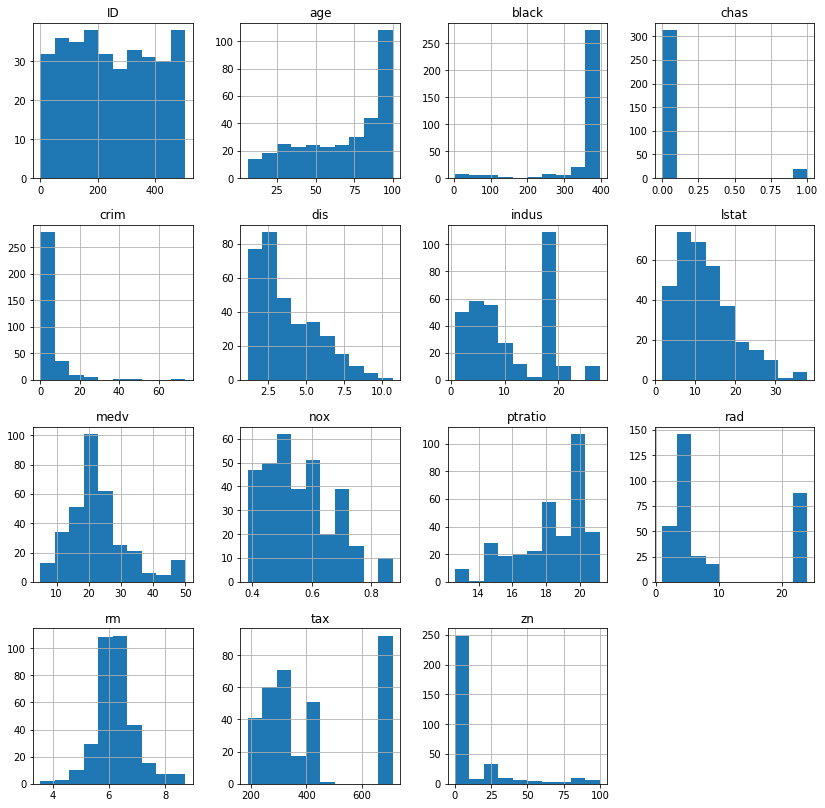

In [27]:
df.hist(figsize = (14,14)) 

### Correlation Matrix

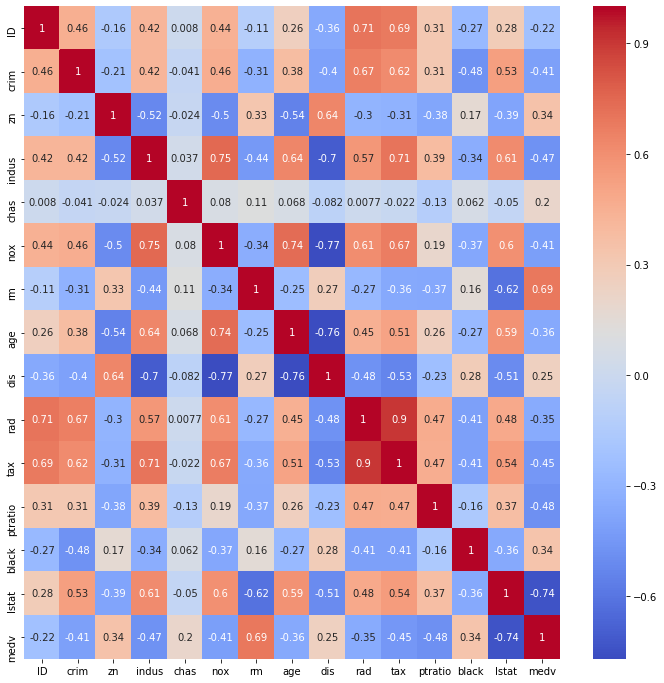

In [30]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


In [31]:
#create a slide that renames the above data